<a href="https://colab.research.google.com/github/SondipPoulSingh/Machine-Learning/blob/main/ML_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Decision Trees can be used for classification or regression tasks. It makes a tree from the columns provided in the dataset. As it creates a tree structure it is important to understand which column will be used as root, cause making trees from different columns may lead to different accuracy.*<br><br>
*Choosing columns for root nodes are based on the entropy of each column. If any column holds less entropy then it will lead to gain more information. Entropy shows the chaos of the data. Gini Impurity is also used instead of entropy. It uses different formula to calculate the chaos and information gain. It is faster than entropy.*<br><br>
*For categorical data entropy is calculated based on the classes, for numerical values each value will be tested. Though it seems time consuming we must remember we do the task only for one time while training.*



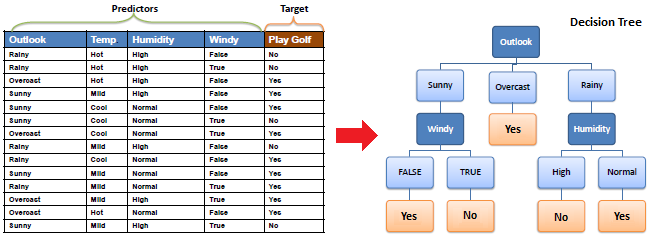<br>
Image Source: Google

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.drop(columns='User ID',inplace=True)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
df.shape

(400, 4)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2,random_state=83
)

In [17]:
X_train.shape, X_test.shape

((320, 3), (80, 3))

In [14]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [21]:
transformer = ColumnTransformer([
              ('ohe', OneHotEncoder(sparse=False,drop='first'),['Gender']),
              ('stdscaler', StandardScaler(),['Age','EstimatedSalary'])
          ], remainder= 'passthrough')

In [23]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [24]:
X_train[0:5]

array([[ 0.        ,  1.96710789,  0.38107739],
       [ 0.        , -0.11192522, -0.22633249],
       [ 1.        ,  0.92759134, -0.83374238],
       [ 1.        ,  0.83308983, -1.35437943],
       [ 0.        ,  1.87260639, -0.6601967 ]])

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [34]:
acc = accuracy_score(y_test,y_pred)*100
print(f'accuracy_score:{acc}%')

accuracy_score:90.0%


In [35]:
confusion_matrix(y_test,y_pred)

array([[54,  2],
       [ 6, 18]])

In [37]:
f1_score(y_test,y_pred)

0.8181818181818182

In [38]:
# changing parameters in Decision_tree

In [39]:
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(X_train,y_train)
y_pred = dt2.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print(f'accuracy_score:{acc}%')

accuracy_score:92.5%


In [40]:
dt3 = DecisionTreeClassifier(max_depth=12)
dt3.fit(X_train,y_train)
y_pred = dt3.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print(f'accuracy_score:{acc}%')

accuracy_score:91.25%


In [44]:
dt3 = DecisionTreeClassifier(criterion='entropy',max_depth=7)
dt3.fit(X_train,y_train)
y_pred = dt3.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print(f'accuracy_score:{acc}%')

accuracy_score:90.0%


In [ ]:
# visualization
from sklearn import tree
tree.plot_tree(dt2) # displays a simplified tree structure

In [48]:
import graphviz 
dot_data = tree.export_graphviz(dt2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("purchase Decision tree") 

'purchase Decision tree.pdf'

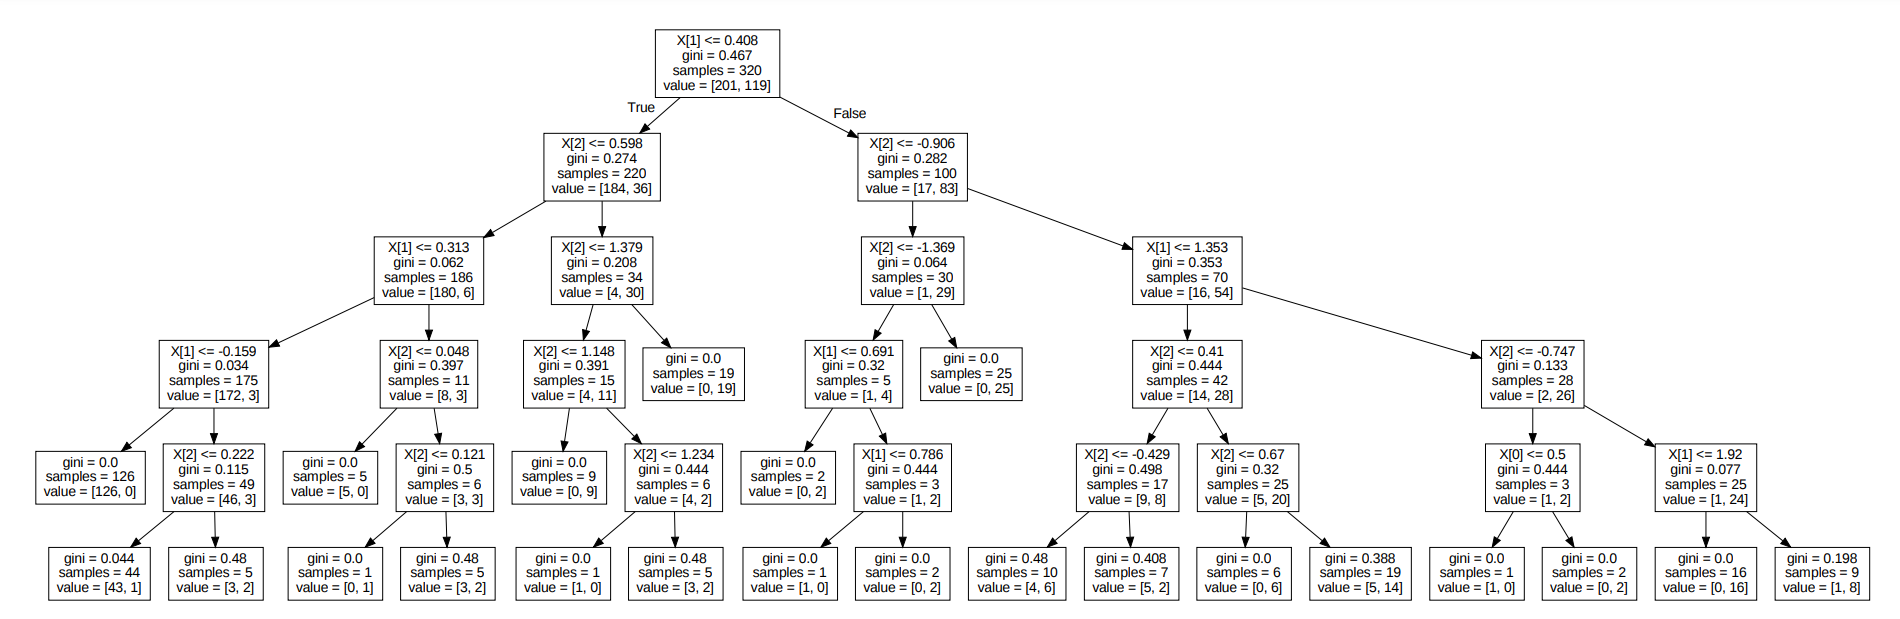